# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1727107895905.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,09/20/2024,5702.55,5709.64,5715.14,5674.49
1,09/19/2024,5713.64,5702.63,5733.57,5686.42
2,09/18/2024,5618.26,5641.68,5689.75,5615.08
3,09/17/2024,5634.58,5655.51,5670.81,5614.05
4,09/16/2024,5633.09,5615.21,5636.05,5604.53
...,...,...,...,...,...
2522,09/29/2014,1977.80,1978.96,1981.28,1964.04
2523,09/26/2014,1982.85,1966.22,1986.37,1966.22
2524,09/25/2014,1965.99,1997.32,1997.32,1965.99
2525,09/24/2014,1998.30,1983.34,1999.79,1978.63


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2527.000000,2527.000000,2527.000000,2527.000000
mean,3242.854978,3233.356941,3250.759359,3214.719288
std,1017.880941,1036.869944,1042.671218,1031.073621
min,1829.080000,0.000000,0.000000,0.000000
25%,2352.055000,2353.855000,2362.365000,2341.045000
50%,2924.920000,2921.830000,2936.830000,2912.630000
75%,4136.380000,4133.025000,4159.475000,4110.900000
max,5713.640000,5709.640000,5733.570000,5686.420000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3248.022110,3247.493239,3264.971741,3228.774102
std,1017.086962,1016.796793,1022.495370,1011.120540
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2358.772500,2357.017500,2367.182500,2350.115000
50%,2926.855000,2925.295000,2939.470000,2913.780000
75%,4137.245000,4135.212500,4160.427500,4112.367500
max,5713.640000,5709.640000,5733.570000,5686.420000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2526
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

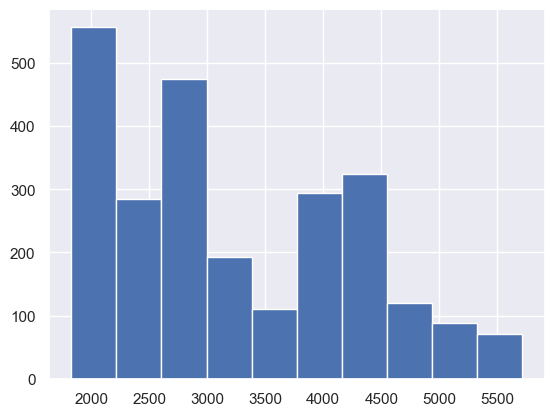

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5702.55

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3248.0221104928482

In [10]:
close_sd = df['Close/Last'].std()
close_sd

1017.0869616573976

In [11]:
sigma1 = close_mean + close_sd
sigma1

4265.109072150246

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5282.196033807643

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5790.739514636342

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2526
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-09-23 to 2024-09-20')

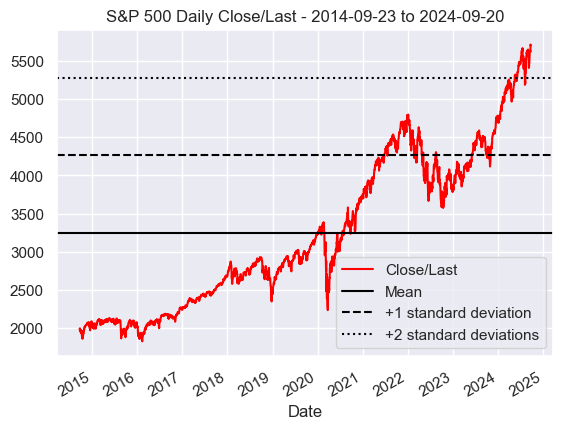

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-09-23 to 2024-09-20')

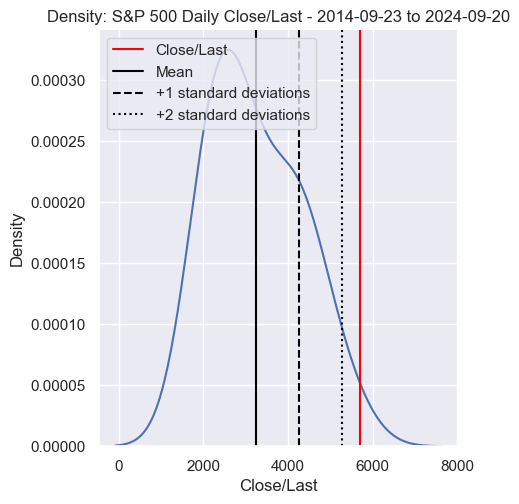

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.4132920605995847

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results